# **Descripción del proyecto**

El objetivo de este proyecto es identificar patrones que determinen si un juego tiene éxito o no, a través del análisis de los datos históricos de ventas de videojuegos en todo el mundo de la tienda online Ice, los cuales incluyen también las reseñas de los usuarios y expertos, géneros y platafomas, información disponible en fuentes abiertas, además de adquirir experiencia de trabajo con datos.

## Información general

In [1]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Carga del dataset y visualización de tamaño
games_df = pd.read_csv('/datasets/games.csv')
games_df.shape

(16715, 11)

In [3]:
# Visualización de información del df
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Visualización de una muestra del archivo
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Preparación de los datos

In [5]:
# Cambio de nombres de columnas a minúsculas
new_columns = []
for col in games_df.columns:
    new_columns.append(col.lower())
games_df.columns = new_columns

games_df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [6]:
# Cambio de los valores de 'year_of_release' a enteros
games_df['year_of_release'] = games_df['year_of_release'].astype('Int64')
games_df['year_of_release'].dtype
games_df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Luego de la visualización del dataset para mayor claridad y manejo de los datos se cambia el nombre de las columnas a minúsculas y el año de lanzamiento a enteros. A continuación, se procede a evaluar y tratar los datos ausentes y duplicados, según sea el caso.

In [7]:
# Visualización de datos nulos
games_df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# Análisis de datos ausentes de 'year_of_release'
games_df['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [9]:
games_year_nan_df = games_df[games_df['year_of_release'].isna()]
games_year_nan_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Los valores ausentes en el año de lanzamiento podrían eliminarse ya que equivalen al 1.6% de los datos de la columna, sin embargo, las líneas con estos estos valores se mantendrán para no afectar los resultados de ventas totales, una vez determinado el período de análisis para el modelo de 2017 se evaluará su eliminación.

In [10]:
# Análisis de valores ausentes de 'critic_score'
games_df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [11]:
games_df[games_df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


El 51% de los datos son valores ausentes, aunque la columna podría ser eliminada por considerarse información no relevante, no será modificada hasta evaluar primero los datos de ventas totales y determinar el período elegido para la construcción del modelo de 2017.

In [12]:
# Análisis de valores ausentes de 'user_score'
games_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
games_df[games_df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
games_df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
0.5       2
2.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [15]:
games_user_score_tbd_df = games_df[games_df['user_score'] == 'tbd']
games_user_score_tbd_df['year_of_release'].value_counts()

2009    405
2010    331
2008    326
2011    217
2007    192
2002    192
2006    124
2005    121
2004    107
2003     95
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: Int64

In [16]:
# Revisión de valores 'tbd'en 'rating'
games_user_score_tbd_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


El puntaje del usuario está disponible aproximadamente para el 60% de los datos, obsevando los valores tbd, no se detecta algún patrón que permita imputarlos, luego del cálculo de ventas y la evaluación del periodo para el modelo de 2017 se definirá su tratamiento.

In [17]:
# Revisión de valores ausentes en 'rating'
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
games_rating_nan_df = games_df[games_df['rating'].isna()]
games_rating_nan_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


La columna 'rating' tiene una 40.5% de valores ausentes, se procederá de igual manera que para las columnas anteriores.

En términos generales, los valores ausentes en el año de lanzamiento pueden originarse por un registro inadecuado de los datos o por que no había certeza de la fecha.  En el caso del rating y la puntuación de los críticos y de los usuarios puede ser que nunca los calificaron o hubo errores en el registro.

In [19]:
# Verificación de duplicados explícitos
games_df.duplicated().sum()

0

No hay duplicados explícitos


## Análisis de los datos

In [20]:
# Visualización de los géneros existentes
games_df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [21]:
# Exploración de los juegos
games_df['name'].value_counts()

Need for Speed: Most Wanted                                                                       12
FIFA 14                                                                                            9
Madden NFL 07                                                                                      9
LEGO Marvel Super Heroes                                                                           9
Ratatouille                                                                                        9
                                                                                                  ..
Super Mario RPG: Legend of the Seven Stars                                                         1
Hisshou Pachinko*Pachi-slot Kouryaku Series DS Vol. 3: Shinseiki Evangelion - Yakusoku no Toki     1
Army Men: Air Combat                                                                               1
J-League Excite Stage '96                                                                  

In [22]:
#Visualización de las plataformas
games_df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [23]:
# Exploración período de los datos
games_df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

In [24]:
games_df.describe(include='all')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [25]:
# Cálculo de ventas totales de cada juego en una nueva columna
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
games_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [26]:
# Número de juegos lanzados por año
games_df['year_of_release'].value_counts().reset_index(name='games_count')

,index,games_count
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


In [27]:
# Visualización de información del año 2008 como ejemplo
games_df[games_df['year_of_release'] == 2008]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
39,Super Smash Bros. Brawl,Wii,2008,Fighting,6.62,2.55,2.66,1.01,93.0,8.9,T,12.84
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
90,Pokémon Platinum Version,DS,2008,Role-Playing,2.76,1.72,2.69,0.54,83.0,8.5,E,7.71
...,...,...,...,...,...,...,...,...,...,...,...,...
16687,Neo Angelique Special,PSP,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E,0.01


In [28]:
# Juegos lanzados por año sin tener en cuenta la plataforma
games_per_year_df = games_df.groupby('year_of_release')['name'].nunique().reset_index(name='game_name')
games_per_year_df

,year_of_release,game_name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


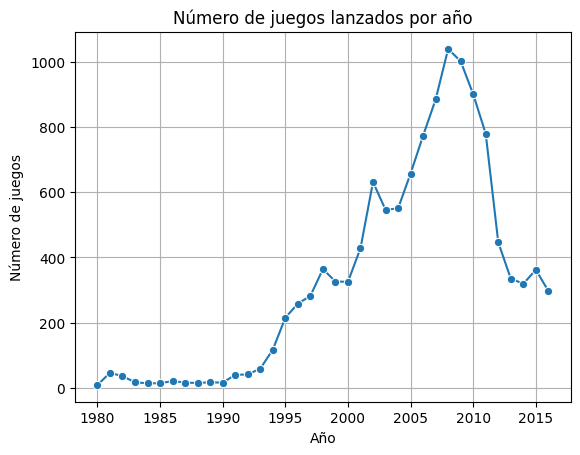

In [29]:
# Gráfico de juegos lanzados por año
sns.lineplot(data=games_per_year_df, x='year_of_release', y='game_name', marker='o')
plt.grid(True)
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.show()

El número de juegos lanzados durante la década de los 80's es inferior a 50 y se mantienen relativamente estables hasta 1994 cuando empiezan a aumentar en forma exponencial hasta llegar a un máximo de 1039 juegos en 2008 para luego decrecer de igual forma hasta 2016 con 297 juegos.

In [30]:
# Ventas totales por plataforma
sales_per_platform_df = games_df.groupby(['platform'])['total_sales'].sum().reset_index(name='platform_sales')
sales_per_platform_df = sales_per_platform_df.sort_values(by='platform_sales', ascending=False)
sales_per_platform_df

,platform,platform_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


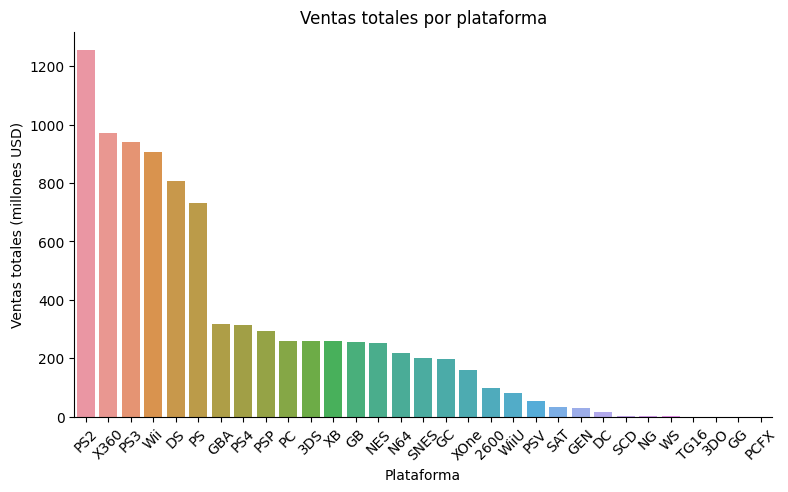

In [31]:
# Gráfico de ventas totales por plataforma
plt.figure(figsize=(9, 5))
sns.barplot(data=sales_per_platform_df, x='platform', y='platform_sales')
sns.despine()
plt.title('Ventas totales por plataforma')
plt.ylabel('Ventas totales (millones USD)')
plt.xlabel('Plataforma')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [32]:
# Distribución de ventas anuales de las plataformas con mayores ventas
platform_sales_top6_df = sales_per_platform_df.head(6)
games_df_top6_platforms = games_df[games_df['platform'].isin(platform_sales_top6_df['platform'])]

In [33]:
sales_per_year_top6platforms_df = games_df_top6_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index(name='platform_sales')
sales_per_year_top6platforms_df

,year_of_release,platform,platform_sales
0,1985,DS,0.02
1,1994,PS,6.03
2,1995,PS,35.96
3,1996,PS,94.70
4,1997,PS,136.17
...,...,...,...
62,2015,Wii,1.14
63,2015,X360,11.96
64,2016,PS3,3.60
65,2016,Wii,0.18


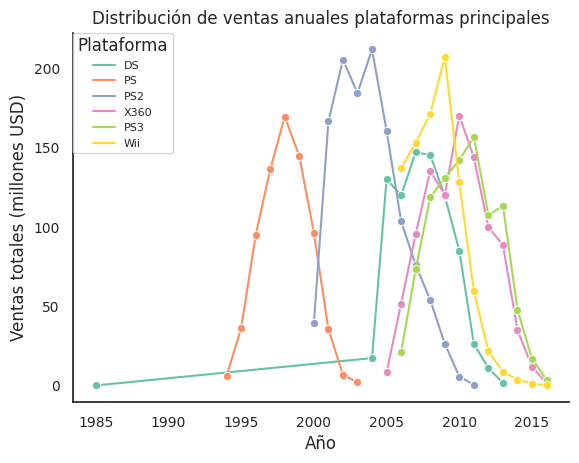

In [34]:
# Gráfico de ventas anuales de plataformas con mayores ventas
sns.set_theme(style="white")
sns.lineplot(data=sales_per_year_top6platforms_df, x='year_of_release', y='platform_sales', hue='platform', marker='o', palette='Set2')
plt.title('Distribución de ventas anuales plataformas principales')
plt.ylabel('Ventas totales (millones USD)')
plt.xlabel('Año')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Plataforma', borderaxespad=0, fontsize=8)
sns.despine()
plt.show()

In [35]:
sales_per_year_top6platforms_df.sort_values(by='year_of_release', ascending=False).head(15)

,year_of_release,platform,platform_sales
66,2016,X360,1.52
65,2016,Wii,0.18
64,2016,PS3,3.60
63,2015,X360,11.96
62,2015,Wii,1.14
61,2015,PS3,16.82
60,2014,X360,34.74
59,2014,Wii,3.75
58,2014,PS3,47.76
57,2013,X360,88.58


De las ventas totales por plataforma, PS2, X360, PS3, Wii, DS y PS alcanzan niveles de ventas superiores en comparación a las demás. De éstas, las únicas que registraron ventas los últimos 3 años fueron PS3, X360 y Wii, mientras que DS facturó solo hasta el año 2013 y PS2 y PS4 salieron del mercado en 2012 y 2004 respectivamente.

Se puede observar que el ciclo de vida de estas plataformas es de aproximadamente 10 años. El liderazgo de PS y PS2 desde 1995 estaría afectado por la entrada de DS, X360 y Wii en 2004, 2005 y 2006 respectivamente y trataria de mantenerlo con PS3. El lanzamiento de estas nuevas plataformas se registra durante los 3 años siguientes al máximo de ventas alcanzado por el referente del sector.  Con base en lo anterior, se tendrá en cuenta el período comprendido entre 2009 y 2016 para la construcción del modelo de 2017, a partir de 2019 se observa la caida en ventas de las plataformas principales y se podría observar el surgimiento de las nacientes.

In [36]:
# Preparación del archivo para el modelo 2017
games_model2017_df = games_df[(games_df['year_of_release'] >= 2009) & (games_df['year_of_release'] <= 2016)]
games_model2017_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6703 entries, 3 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6703 non-null   object 
 1   platform         6703 non-null   object 
 2   year_of_release  6703 non-null   Int64  
 3   genre            6703 non-null   object 
 4   na_sales         6703 non-null   float64
 5   eu_sales         6703 non-null   float64
 6   jp_sales         6703 non-null   float64
 7   other_sales      6703 non-null   float64
 8   critic_score     2963 non-null   float64
 9   user_score       4198 non-null   object 
 10  rating           4124 non-null   object 
 11  total_sales      6703 non-null   float64
dtypes: Int64(1), float64(6), object(5)
memory usage: 687.3+ KB


In [37]:
games_model2017_nan_df = games_model2017_df[(games_model2017_df['critic_score'].isna()) & (games_model2017_df['user_score'].isna()) & (games_model2017_df['rating'].isna())]
games_model2017_nan_df['total_sales'].value_counts().head(10)


0.02    359
0.01    260
0.03    255
0.04    162
0.05    133
0.08     89
0.06     88
0.07     68
0.09     65
0.11     53
Name: total_sales, dtype: int64

Los valores ausentes ausentes aunque en gran parte se presentan en los juegos con ventas mínimas, no se eliminarán ni imputarán hasta que se realicen los análisis de ventas.

In [38]:
# Plataformas líderes en ventas
games_model2017_total_sales_df = games_model2017_df.groupby('platform')['total_sales'].sum().reset_index(name='platform_sales')
games_model2017_total_sales_df.sort_values(by='platform_sales', ascending=False).head(6)

,platform,platform_sales
4,PS3,718.67
10,X360,670.70
8,Wii,429.94
5,PS4,314.14
0,3DS,257.81
1,DS,243.29


In [39]:
# Ventas anuales de cada plataforma, ejemplo en 2016
games_model2017_yearly_sales_df = games_model2017_df.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index(name='platform_sales')
games_model2017_yearly_sales_df[games_model2017_yearly_sales_df['year_of_release'] == 2016]

,year_of_release,platform,platform_sales
63,2016,3DS,15.14
64,2016,PC,5.25
65,2016,PS3,3.60
66,2016,PS4,69.25
67,2016,PSV,4.25
68,2016,Wii,0.18
69,2016,WiiU,4.60
70,2016,X360,1.52
71,2016,XOne,26.15


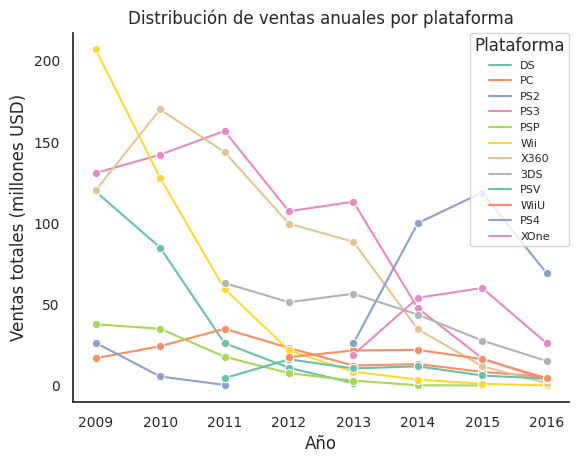

In [40]:
# Gráfico de distribución de ventas anuales
sns.set_theme(style="white")
sns.lineplot(data=games_model2017_yearly_sales_df, x='year_of_release', y='platform_sales', hue='platform', marker='o', palette='Set2')
plt.title('Distribución de ventas anuales por plataforma')
plt.ylabel('Ventas totales (millones USD)')
plt.xlabel('Año')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Plataforma', borderaxespad=0, fontsize=8)
sns.despine()
plt.show()

En las ventas anuales por plataforma durante el periodo 2009-2016 se puede observar que las nuevas plataformas no alcanzan crecimientos considerables como las de años anteriores y probablemente los tiempos del ciclo de vida sean más cortos.

Asumiendo que los registros del año 2016 estén completos y sean válidos, se observa que las plataformas líderes en ventas durante el período 2009-2016 fueron, PS3, X360 y Wii, le siguen PS4 y 3DS.  Las tres primeras en su tendencia decreciente alcanzan valores mínimos en 2016 indicando su posible salida del mercado.  PS4, aunque presenta las ventas más altas del último año son considerablemente menores a las del año anterior; este mismo comportamiento presenta XOne y 3DS, segundo y tercero en ventas respectivamente; en términos generales las ventas disminuyeron en todas las plataformas.

Se podría considerar como plataformas potencialmente rentables, además de las las líderes del período mencionadas anteriormente:
* PC: aún se mantiene desde que apareció en 2009 y ahora ocupa el 4 lugar en ventas.  
* WiiU: relativamente nueva, presenta ventas sostenidas.
* PSV: presenta ventas regulares desde 2011.



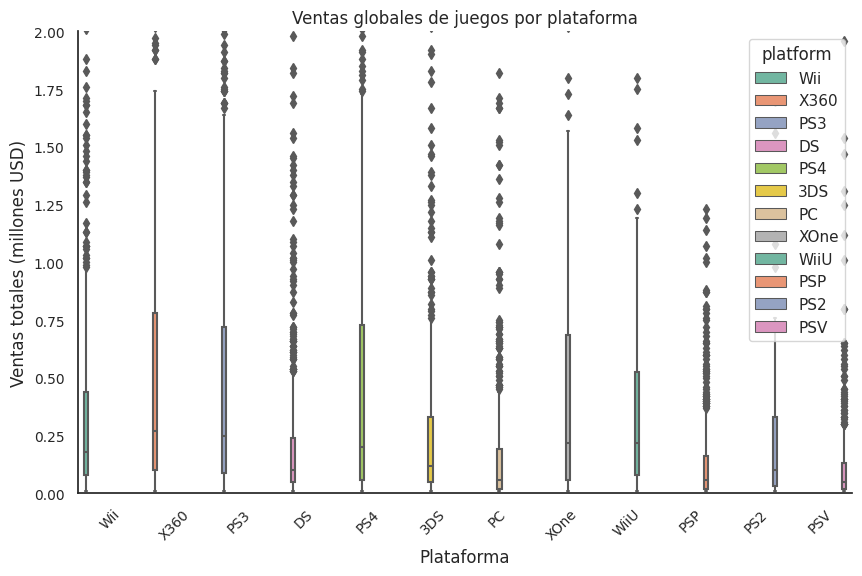

In [41]:
# Diagrama de caja de ventas globales de todos los juegos desglosados por plataforma
plt.figure(figsize=(10, 6))
sns.boxplot(data=games_model2017_df, x='platform', y='total_sales', hue='platform', palette='Set2')
sns.despine()
plt.title('Ventas globales de juegos por plataforma')
plt.ylabel('Ventas totales (millones USD)')
plt.xlabel('Plataforma')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 2)
plt.show()

In [42]:
# Ventas promedio de cada plataforma
games_model2017_total_sales_mean_df = games_model2017_df.groupby('platform')['total_sales'].mean().reset_index(name='mean_sales')
games_model2017_total_sales_mean_df.sort_values(by='mean_sales', ascending=False)

,platform,mean_sales
5,PS4,0.801378
10,X360,0.787207
4,PS3,0.683796
11,XOne,0.645020
9,WiiU,0.559116
8,Wii,0.554761
0,3DS,0.503535
1,DS,0.267352
2,PC,0.236980
3,PS2,0.230426


Comparando los valores de ventas de la tabla con los gráficos de caja se observa diferencias considerables a excepción de las ventas en las plataformas X360, PS3, PS4.  Por otro lado, los promedios de ventas se alejan de la mediana probablemente por la presencia de muchos valores atípicos y valores extremos que distorsionan la distribución de los datos y afectan la media.

In [43]:
# Influencia de las reseñas en las ventas en una plataforma top
games_model2017_X360_df = games_model2017_df[games_model2017_df['platform'] == 'X360']
games_model2017_X360_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


In [44]:
games_model2017_X360_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 14 to 16654
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             852 non-null    object 
 1   platform         852 non-null    object 
 2   year_of_release  852 non-null    Int64  
 3   genre            852 non-null    object 
 4   na_sales         852 non-null    float64
 5   eu_sales         852 non-null    float64
 6   jp_sales         852 non-null    float64
 7   other_sales      852 non-null    float64
 8   critic_score     565 non-null    float64
 9   user_score       692 non-null    object 
 10  rating           695 non-null    object 
 11  total_sales      852 non-null    float64
dtypes: Int64(1), float64(6), object(5)
memory usage: 87.4+ KB


In [45]:
# Valores 'tbd' en 'user_score'
games_model2017_X360_user_score_tbd_df = games_model2017_X360_df[games_model2017_X360_df['user_score'] == 'tbd']
games_model2017_X360_user_score_tbd_df['name'].sample(5)

9778                  Dance Paradise
16301                      Caladrius
4379           Brunswick Pro Bowling
8859     Rock Band: Metal Track Pack
10562        Cabela's Adventure Camp
Name: name, dtype: object

In [46]:
# Ejemplo de datos de un juego con valores tbd
games_model2017_df[games_model2017_df['name'] == "Rapala Pro Bass Fishing 2010"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4831,Rapala Pro Bass Fishing 2010,X360,2010,Sports,0.32,0.05,0.0,0.03,NaN,tbd,E,0.40
5922,Rapala Pro Bass Fishing 2010,Wii,2010,Sports,0.22,0.05,0.0,0.03,NaN,tbd,E,0.30
6346,Rapala Pro Bass Fishing 2010,PS3,2010,Sports,0.18,0.05,0.0,0.03,NaN,8.5,E,0.26
10761,Rapala Pro Bass Fishing 2010,DS,2010,Sports,0.09,0.00,0.0,0.01,NaN,tbd,E,0.10
11599,Rapala Pro Bass Fishing 2010,PS2,2010,Sports,0.04,0.03,0.0,0.01,NaN,tbd,E,0.08
11907,Rapala Pro Bass Fishing 2010,PSP,2010,Sports,0.06,0.00,0.0,0.01,NaN,tbd,E,0.07


Al considerar imputar los valores ausentes y los 'tbd' con el promedio de las reseñas de esos juegos en otras plataformas se puede incurrir en generalizaciones inadecuadas, en muchos casos la cantidad de valores nulos o tbd es mayor que las reseñas, las calificaciones son muy diferentes para obtener un promedio confiable, por lo tanto, para visualizar el efecto de las reseñas de la crítica y de los usuarios en las ventas se tendrán en cuenta solo los datos con información.

In [47]:
# Conversión de los datos de 'user_score' a tipo numérico
games_model2017_X360_df["user_score"] = pd.to_numeric(games_model2017_X360_df["user_score"], errors="coerce")

/tmp/ipykernel_597/2742504612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_model2017_X360_df["user_score"] = pd.to_numeric(games_model2017_X360_df["user_score"], errors="coerce")


In [48]:
# Verificación del tipo de datos
games_model2017_X360_df["user_score"].dtype

dtype('float64')

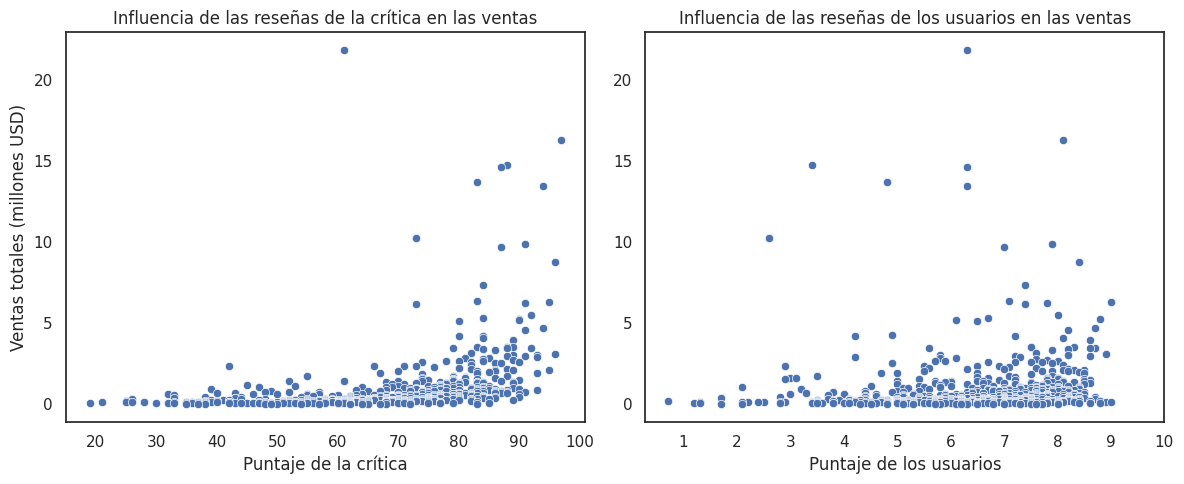

In [49]:
# Gráficos de dispersión de reseñas y ventas en plataforma X360.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=games_model2017_X360_df, x='critic_score', y='total_sales', ax=axes[0])
axes[0].set_title('Influencia de las reseñas de la crítica en las ventas')
axes[0].set_ylabel('Ventas totales (millones USD)')
axes[0].set_xlabel('Puntaje de la crítica')

sns.scatterplot(data=games_model2017_X360_df, x='user_score', y='total_sales', ax=axes[1])
axes[1].set_title('Influencia de las reseñas de los usuarios en las ventas')
axes[1].set_xlabel('Puntaje de los usuarios')
axes[1].set_ylabel("")
plt.xticks(ticks=range(1, 11))
plt.tight_layout()
plt.show()

In [50]:
# Correlación entre las reseñas de crítica y las ventas
correlation_sales_critic = games_model2017_X360_df["total_sales"].corr(games_model2017_X360_df["critic_score"])
correlation_sales_critic

0.3639333144008456

In [51]:
# Correlación entre las reseñas del usuario y las ventas
correlation_sales_user = games_model2017_X360_df["total_sales"].corr(games_model2017_X360_df["user_score"])
correlation_sales_user

0.08310848867309226

La correlación de las ventas y las reseñas de la crítica es positiva débil, es decir que aunque se observa algo de relación, sobre todo en las puntuaciones altas, la crítica no es determinante para una predicción. Y la de ventas con respecto a las valoraciones de los usuarios es casi nula, lo que opinan los usuarios no tiene relación con las ventas.

In [52]:
# Juegos de X360 en otras plataformas
X360games = games_model2017_X360_df['name']
games_model2017_X360games_df = games_model2017_df[games_model2017_df['name'].isin(X360games)]
games_model2017_X360games_df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1725,WWE '12,PS3,2011,Fighting,0.53,0.45,0.02,0.17,72.0,6.9,T,1.17
1393,Injustice: Gods Among Us,X360,2013,Fighting,0.97,0.30,0.00,0.11,81.0,7.9,T,1.38
13001,PAC-MAN and the Ghostly Adventures,WiiU,2013,Platform,0.03,0.01,0.00,0.00,58.0,6.5,E10+,0.04
11091,Back to the Future: The Game,PS3,2011,Adventure,0.07,0.01,0.00,0.01,66.0,6.8,NaN,0.09
11439,Transformers: Devastation,X360,2015,Action,0.06,0.01,0.00,0.01,NaN,8.4,T,0.08


In [53]:
# Dataset juegos de X360 en PS3
games_model2017_X360games_PS3_df = games_model2017_X360games_df[games_model2017_X360games_df['platform'] == 'PS3']
games_model2017_X360games_PS3_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
55,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M,10.61


In [54]:
# Conversión del tipo de datos a numéricos
games_model2017_X360games_PS3_df["user_score"] = pd.to_numeric(games_model2017_X360games_PS3_df["user_score"], errors="coerce")

/tmp/ipykernel_597/3444730252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_model2017_X360games_PS3_df["user_score"] = pd.to_numeric(games_model2017_X360games_PS3_df["user_score"], errors="coerce")


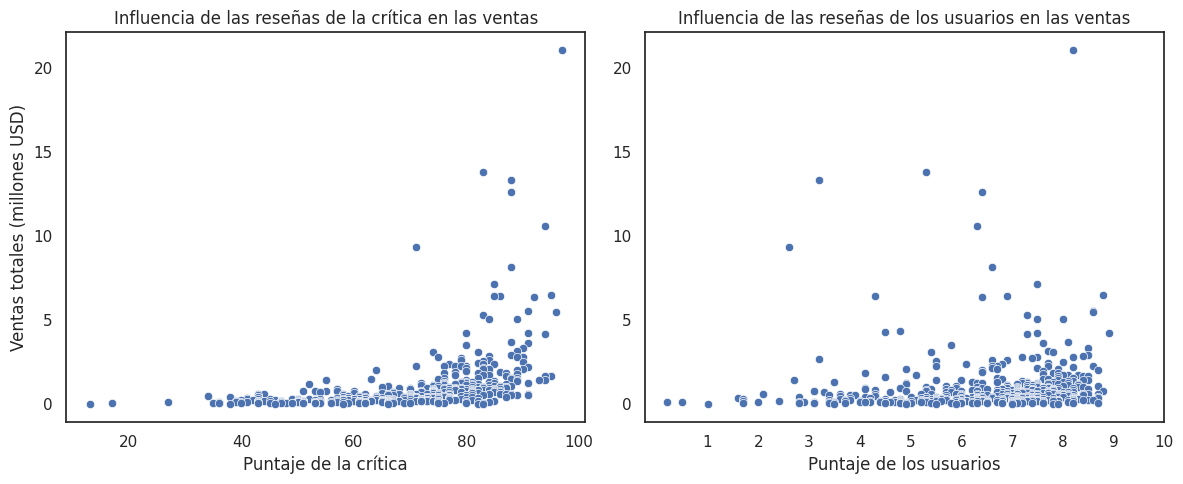

In [55]:
# Gráficos de dispersión de reseñas y ventas en plataforma PS3.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=games_model2017_X360games_PS3_df, x='critic_score', y='total_sales', ax=axes[0])
axes[0].set_title('Influencia de las reseñas de la crítica en las ventas')
axes[0].set_ylabel('Ventas totales (millones USD)')
axes[0].set_xlabel('Puntaje de la crítica')

sns.scatterplot(data=games_model2017_X360games_PS3_df, x='user_score', y='total_sales', ax=axes[1])
axes[1].set_title('Influencia de las reseñas de los usuarios en las ventas')
axes[1].set_xlabel('Puntaje de los usuarios')
axes[1].set_ylabel("")
plt.xticks(ticks=range(1, 11))
plt.tight_layout()
plt.show()

In [56]:
# Correlación entre las reseñas de la crítica y las ventas
correlation_sales_critic_PS3 = games_model2017_X360games_PS3_df["total_sales"].corr(games_model2017_X360games_PS3_df["critic_score"])
correlation_sales_critic_PS3

0.4108837493562027

In [57]:
# Correlación entre las reseñas de los usuarios y las ventas
correlation_sales_user_PS3 = games_model2017_X360games_PS3_df["total_sales"].corr(games_model2017_X360games_PS3_df["user_score"])
correlation_sales_user_PS3

0.08961498434691882

La correlación entre las ventas y las reseñas de la crítica en la plataforma PS3 es similar a la de X360, de igual manera para las valoraciones de los usuarios.

In [58]:
# Dataset juegos de X360 en Wii
games_model2017_X360games_Wii_df = games_model2017_X360games_df[games_model2017_X360games_df['platform'] == 'Wii']
games_model2017_X360games_Wii_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+,10.12
116,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.00,0.55,74.0,7.3,E10+,6.76
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E,6.70
254,Michael Jackson: The Experience,Wii,2010,Misc,2.64,1.33,0.01,0.39,56.0,8.3,E10+,4.37
359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+,3.58


In [59]:
# Conversión del tipo de datos a numéricos
games_model2017_X360games_Wii_df["user_score"] = pd.to_numeric(games_model2017_X360games_Wii_df["user_score"], errors="coerce")

/tmp/ipykernel_597/2930858915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_model2017_X360games_Wii_df["user_score"] = pd.to_numeric(games_model2017_X360games_Wii_df["user_score"], errors="coerce")


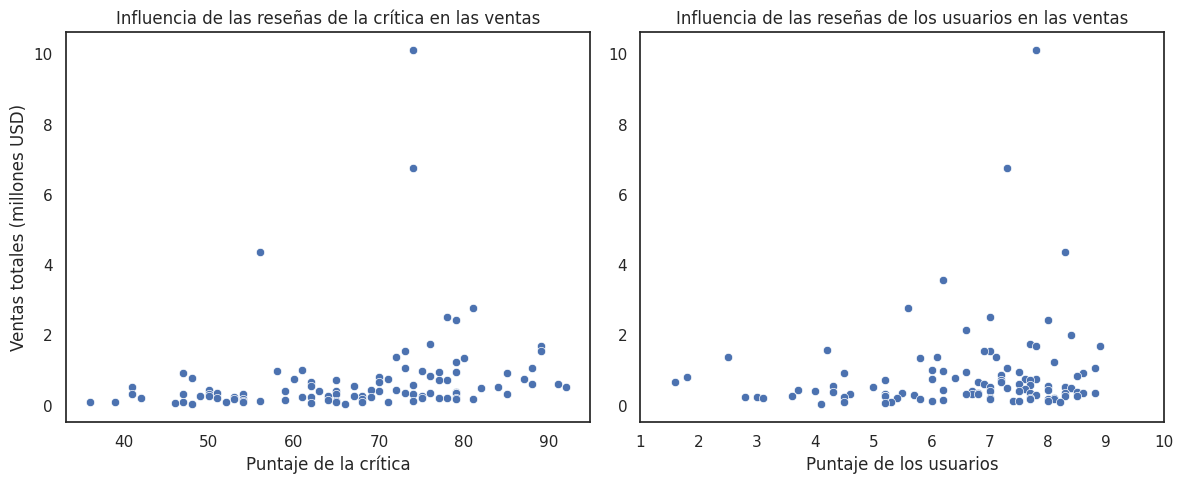

In [60]:
# Gráficos de dispersión de reseñas y ventas en plataforma Wii.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=games_model2017_X360games_Wii_df, x='critic_score', y='total_sales', ax=axes[0])
axes[0].set_title('Influencia de las reseñas de la crítica en las ventas')
axes[0].set_ylabel('Ventas totales (millones USD)')
axes[0].set_xlabel('Puntaje de la crítica')

sns.scatterplot(data=games_model2017_X360games_Wii_df, x='user_score', y='total_sales', ax=axes[1])
axes[1].set_title('Influencia de las reseñas de los usuarios en las ventas')
axes[1].set_xlabel('Puntaje de los usuarios')
axes[1].set_ylabel("")
plt.xticks(ticks=range(1, 11))
plt.tight_layout()
plt.show()

In [61]:
# Correlación entre las reseñas de la crítica y las ventas
correlation_sales_critic_Wii = games_model2017_X360games_Wii_df["total_sales"].corr(games_model2017_X360games_Wii_df["critic_score"])
correlation_sales_critic_Wii

0.20942751378820285

In [62]:
# Correlación entre las reseñas de los usuarios y las ventas
correlation_sales_user_Wii = games_model2017_X360games_Wii_df["total_sales"].corr(games_model2017_X360games_Wii_df["user_score"])
correlation_sales_user_Wii

0.14208151953700784

No hay una correlación lineal clara entre las ventas y las reseñas tanto de la crítica como de los usuarios.

In [63]:
# Distribución general de los juegos por género
genre_games_df = games_model2017_df.groupby('genre')['name'].count().reset_index(name='games_number')
genre_games_df = genre_games_df.sort_values(by='games_number', ascending=False)
genre_games_df

,genre,games_number
0,Action,1767
3,Misc,782
10,Sports,758
1,Adventure,703
7,Role-Playing,671
8,Shooter,500
9,Simulation,340
6,Racing,321
2,Fighting,252
11,Strategy,234


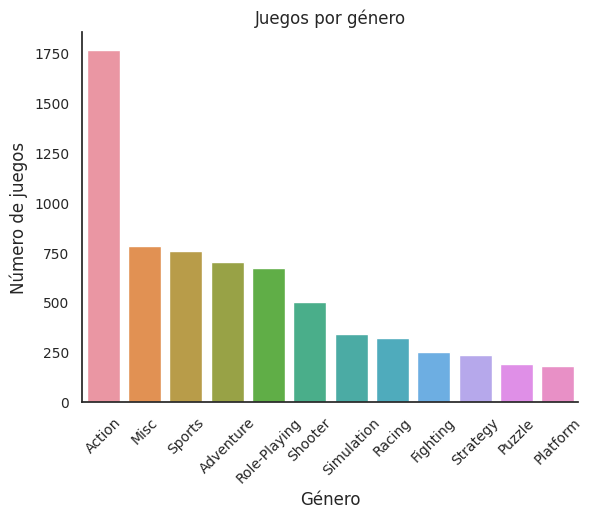

In [64]:
# Grafico juegos por género
sns.barplot(data=genre_games_df, x='genre', y='games_number')
sns.despine()
plt.title('Juegos por género')
plt.ylabel('Número de juegos')
plt.xlabel('Género')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [65]:
# Distribución de las ventas por género
genre_sales_df = games_model2017_df.groupby('genre')['total_sales'].sum().reset_index(name='genre_sales')
genre_sales_df = genre_sales_df.sort_values(by='genre_sales', ascending=False)

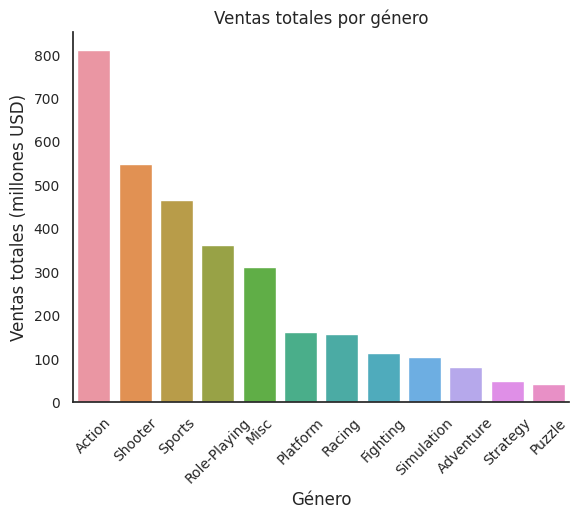

In [66]:
# Gráfico de las ventas por género
sns.barplot(data=genre_sales_df, x='genre', y='genre_sales')
sns.despine()
plt.title('Ventas totales por género')
plt.ylabel('Ventas totales (millones USD)')
plt.xlabel('Género')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [67]:
# Ventas anuales por género
genre_sales_per_year_df = games_model2017_df.groupby(['year_of_release','genre'])['total_sales'].sum().reset_index(name='genre_sales')


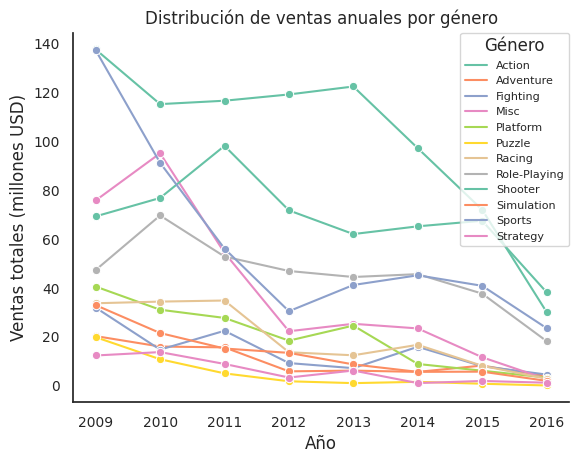

In [68]:
sns.set_theme(style="white")
sns.lineplot(data=genre_sales_per_year_df, x='year_of_release', y='genre_sales', hue='genre', marker='o', palette='Set2')
plt.title('Distribución de ventas anuales por género')
plt.ylabel('Ventas totales (millones USD)')
plt.xlabel('Año')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Género', borderaxespad=0, fontsize=8)
sns.despine()
plt.show()

Nuevamente, asumiendo que los datos de 2016 estén completos, los géneros con mayores ventas son, acción, disparos, deportes y juegos de roles; a excepción del género acción no se puede observar una relación directa entre la cantidad de juegos y las unidades vendidas. Entre 2009 y 2011 miscelaneos estuvo entre las 4 mejores categorías, pero a partir de 2012 se consolidan los géneros mencionados inicialmente con un comportamiento de ventas similar a lo largo del período. Los demás géneros muestran alternancia en las posiciones manteniendo sus volúmenes de ventas.

In [69]:
# Ventas totales y cuotas de mercado de las 5 principales plataformas por región

# Región NA
# Ventas totales
sales_per_platform_na_df = games_model2017_df.groupby('platform')['na_sales'].sum()
# Cuota de mercado
market_share_na = (sales_per_platform_na_df / sales_per_platform_na_df.sum()) * 100
market_share_na_top5 = market_share_na.sort_values(ascending=False).head()

In [70]:
# Región EU
# Ventas totales
sales_per_platform_eu_df = games_model2017_df.groupby('platform')['eu_sales'].sum()
# Cuota de mercado
market_share_eu = (sales_per_platform_eu_df / sales_per_platform_eu_df.sum()) * 100
market_share_eu_top5 = market_share_eu.sort_values(ascending=False).head()

In [71]:
# Región JP
# Ventas totales
sales_per_platform_jp_df = games_model2017_df.groupby('platform')['jp_sales'].sum()
# Cuota de mercado
market_share_jp = (sales_per_platform_jp_df / sales_per_platform_jp_df.sum()) * 100
market_share_jp_top5 = market_share_jp.sort_values(ascending=False).head()

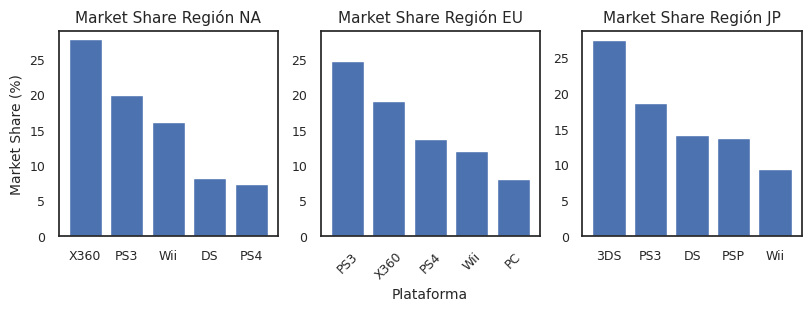

In [72]:
# Grafico de cuotas de mercado de las 5 principales plataformas por región

fig = plt.figure(constrained_layout=True, figsize=(8, 3))
gs = fig.add_gridspec(1, 3)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)

ax1 = fig.add_subplot(gs[0, 0])
plt.bar(market_share_na_top5.index, market_share_na_top5.values)
plt.ylabel('Market Share (%)', fontsize=10)
plt.ylim(0, 29)
plt.title('Market Share Región NA', fontsize=11)

ax2 = fig.add_subplot(gs[0, 1])
plt.bar(market_share_eu_top5.index, market_share_eu_top5.values)
plt.xlabel('Plataforma', fontsize=10)
plt.ylim(0, 29)
plt.title('Market Share Región EU', fontsize=11)
plt.xticks(rotation=45)

ax3 = fig.add_subplot(gs[0, 2])
plt.bar(market_share_jp_top5.index, market_share_jp_top5.values)
plt.title('Market Share Región JP', fontsize=11)

plt.show()

Las cuotas de mercado varían considerablemente en la región JP con respecto a las otras dos, por ejemplo, 3DS la plataforma líder en JP, y  PSP, no aparecen en el top de NA ni de EU.  
X360 tiene la cuota más alta en NA, mientras PS3 la tiene en EU.  Wii está presente en los tres mercados con una participación mas alta en NA, seguida de EU y JP.  PS3 en JP tiene participaciones similares a las de NA y en EU ocupa el primer lugar.

In [73]:
# Ventas totales y cuotas de mercado de los 5 principales géneros por región

# Región NA
# Ventas totales
sales_per_genre_na_df = games_model2017_df.groupby('genre')['na_sales'].sum()
# Cuota de mercado
market_share_na_genre = (sales_per_genre_na_df / sales_per_genre_na_df.sum()) * 100
market_share_na_genretop5 = market_share_na_genre.sort_values(ascending=False).head()

In [74]:
# Región EU
# Ventas totales, top 5 géneros
sales_per_genre_eu_df = games_model2017_df.groupby('genre')['eu_sales'].sum()
# Cuota de mercado
market_share_eu_genre = (sales_per_genre_eu_df / sales_per_genre_eu_df.sum()) * 100
market_share_eu_genretop5 = market_share_eu_genre.sort_values(ascending=False).head()

In [75]:
# Región JP
# Ventas totales, top 5 géneros
sales_per_genre_jp_df = games_model2017_df.groupby('genre')['jp_sales'].sum()
# Cuota de mercado
market_share_jp_genre = (sales_per_genre_jp_df / sales_per_genre_jp_df.sum()) * 100
market_share_jp_genretop5 = market_share_jp_genre.sort_values(ascending=False).head()

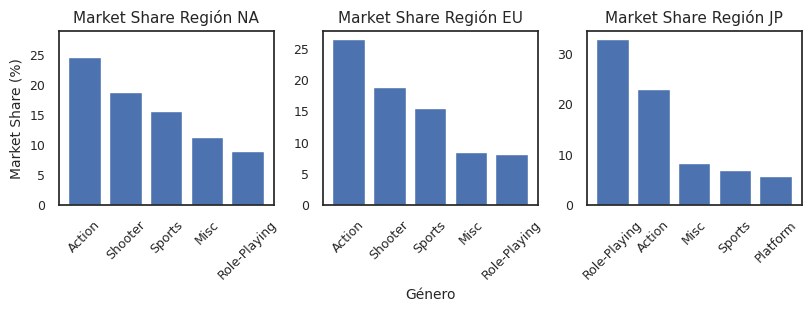

In [76]:
# Grafico de cuotas de mercado de los 5 principales géneros por región

fig = plt.figure(constrained_layout=True, figsize=(8, 3))
gs = fig.add_gridspec(1, 3)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)

ax1 = fig.add_subplot(gs[0, 0])
plt.bar(market_share_na_genretop5.index, market_share_na_genretop5.values)
plt.ylabel('Market Share (%)', fontsize=10)
plt.ylim(0, 29)
plt.title('Market Share Región NA', fontsize=11)
plt.xticks(rotation=45)

ax2 = fig.add_subplot(gs[0, 1])
plt.bar(market_share_eu_genretop5.index, market_share_eu_genretop5.values)
plt.xlabel('Género', fontsize=10)
plt.title('Market Share Región EU', fontsize=11)
plt.xticks(rotation=45)

ax3 = fig.add_subplot(gs[0, 2])
plt.bar(market_share_jp_genretop5.index, market_share_jp_genretop5.values)
plt.title('Market Share Región JP', fontsize=11)
plt.xticks(rotation=45)

plt.show()

Los géneros principales coinciden y tienen participaciones similares en NA y EU donde acción es el predominante, en cambio en JP, la categoría de juego de roles tiene la cuota más alta desplazando a la de acción y deportes.  El género disparos no hace parte del top de JP y es el segundo género en las otras dos regiones.

In [77]:
# Relación entre las clasificaciones de ESRB y las ventas en regiones individuales
# Visualizacion de categorías en rating
games_model2017_df['rating'].value_counts()

E       1373
T       1106
M        841
E10+     797
EC         6
RP         1
Name: rating, dtype: int64

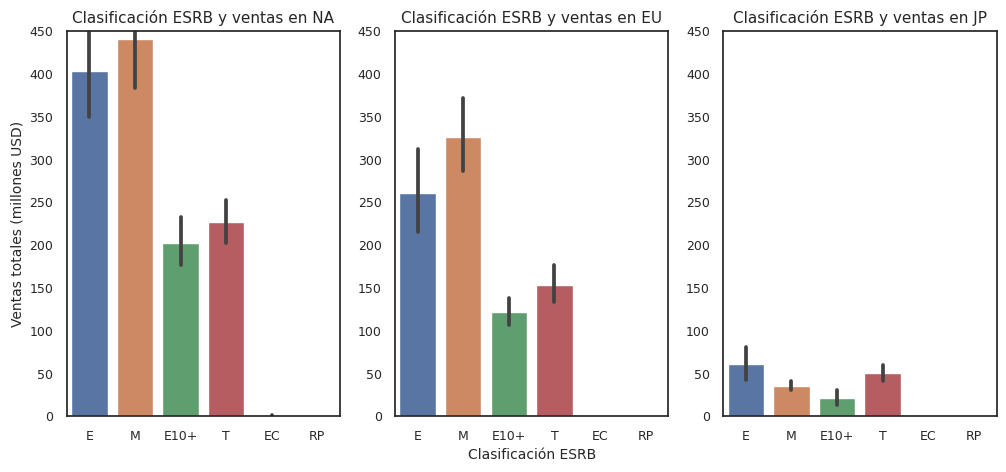

In [79]:
# Gráficos de dispersión de las clasificaciones de ESRB y las ventas por región
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.barplot(data=games_model2017_df, x='rating', y='na_sales', estimator=sum, errorbar=None, ax=axes[0])
axes[0].set_title('Clasificación ESRB y ventas en NA', fontsize=11)
axes[0].set_ylabel('Ventas totales (millones USD)', fontsize=10)
axes[0].set_xlabel("")
axes[0].set_ylim(0, 450)

sns.barplot(data=games_model2017_df, x='rating', y='eu_sales', estimator=sum, errorbar=None, ax=axes[1])
axes[1].set_title('Clasificación ESRB y ventas en EU', fontsize=11)
axes[1].set_xlabel('Clasificación ESRB', fontsize=10)
axes[1].set_ylabel("")
axes[1].set_ylim(0, 450)

sns.barplot(data=games_model2017_df, x='rating', y='jp_sales', estimator=sum, errorbar=None, ax=axes[2])
axes[2].set_title('Clasificación ESRB y ventas en JP', fontsize=11)
axes[2].set_ylabel('Ventas totales (millones USD)')
axes[2].set_xlabel("")
axes[2].set_ylabel("")
axes[2].set_ylim(0, 450)

plt.show()

Las regiones NA y EU tienen una distribución similar de las ventas con respecto a la clasificación ESRB guardando las proporciones en sus volúmenes.  Las ventas más altas corresponden al contenido para adultos M, seguidas por E (apto para todo público), T (para adolescentes) y E10+ (mayores de 10 años).
En JP la clasificación con más ventas es E y le sigue T, M y E10+, el contenido para adultos es el tercero del top mientras que en las otras regiones es el líder.

In [80]:
# Conversión del tipo de datos de calificaciones de los usuarios
games_model2017_df['user_score'] = pd.to_numeric(games_model2017_df['user_score'], errors='coerce')
games_model2017_df['user_score'].dtype

/tmp/ipykernel_597/2708280212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_model2017_df['user_score'] = pd.to_numeric(games_model2017_df['user_score'], errors='coerce')


dtype('float64')

In [81]:
# Eliminación de valores nulos
games_model2017_df['user_score'].isna().sum()

3590

In [82]:
games_model2017_clean_df = games_model2017_df.dropna(subset=['user_score'])
games_model2017_clean_df['user_score'].isna().sum()

0

In [83]:
# Media de las calificaciones de usuarios de XOne
user_score_XOne_mean = games_model2017_clean_df[games_model2017_clean_df['platform'] == 'XOne']['user_score'].mean()
user_score_XOne_mean

6.521428571428572

In [84]:
# Varianza calificaciones promedio usuarios XOne
var_user_score_XOne = games_model2017_clean_df[games_model2017_clean_df['platform'] == 'XOne']['user_score'].var()
var_user_score_XOne

1.9069968429360695

In [85]:
# Desviación std calificaciones promedio usuarios XOne
dev_std_user_score_XOne = np.sqrt(var_user_score_XOne)
dev_std_user_score_XOne

1.380940564592144

In [86]:
# Media de las calificaciones de usuarios de PC
user_score_PC_mean = games_model2017_clean_df[games_model2017_clean_df['platform'] == 'PC']['user_score'].mean()
user_score_PC_mean

6.652078774617068

In [87]:
# Varianza calificaciones promedio usuarios PC
var_user_score_PC = games_model2017_clean_df[games_model2017_clean_df['platform'] == 'PC']['user_score'].var()
var_user_score_PC

2.4102204499213022

In [88]:
# Desviación std calificaciones promedio usuarios PC
dev_std_user_score_PC = np.sqrt(var_user_score_PC)
dev_std_user_score_PC

1.5524884701411803

## Pruebas de hipótesis

In [89]:
# Hipótesis nula: Las calificaciones promedio de los usuarios en  las plataformas XOne y PC son iguales.
# Hipótesis alternativa: Las calificaciones promedio de los usuarios en  las plataformas XOne y PC no son iguales.

user_score_XOne = games_model2017_clean_df[games_model2017_clean_df['platform'] == 'XOne']['user_score']
user_score_PC = games_model2017_clean_df[games_model2017_clean_df['platform'] == 'PC']['user_score']

alpha = 0.05 # valor más utilizado como nivel de significancia
results = st.ttest_ind(user_score_XOne, user_score_PC, equal_var=False)

print("Valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Rechazar la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")


Valor p: 0.29856178733970584
No se puede rechazar la hipótesis nula


Se plantea la hipótesis nula teniendo en cuenta que implica la ausencia de diferencias, y a partir de ésta se formula la hipótesis alternativa. Se utiliza la prueba de hipótesis sobre la igualdad de las medias de dos poblaciones con un nivel de significancia de 0.05, por ser un valor intermedio del umbral y el más utilizado, teniendo en cuenta también, la diferencia de las varianzas.

Finalmente, no se rechaza la hipótesis nula y los resultados sugieren que las calificaciones promedio de los usuarios para los dos grupos podrían ser iguales.


In [90]:
# Visualización de géneros
games_model2017_clean_df['genre'].value_counts().head()

Action          936
Sports          400
Shooter         393
Role-Playing    323
Misc            196
Name: genre, dtype: int64

In [91]:
# Media de las calificaciones de usuarios del género Action
user_score_Action_mean = games_model2017_clean_df[games_model2017_clean_df['genre'] == 'Action']['user_score'].mean()
user_score_Action_mean

6.81741452991453

In [92]:
# Varianza calificaciones promedio usuarios Action
var_user_score_Action = games_model2017_clean_df[games_model2017_clean_df['genre'] == 'Action']['user_score'].var()
var_user_score_Action

1.845225821564057

In [93]:
# Desviación std calificaciones promedio usuarios Action
dev_std_user_score_Action = np.sqrt(var_user_score_Action)
dev_std_user_score_Action

1.3583908942436478

In [94]:
# Media de las calificaciones de usuarios del género Sports
user_score_Sports_mean = games_model2017_clean_df[games_model2017_clean_df['genre'] == 'Sports']['user_score'].mean()
user_score_Sports_mean

6.105250000000001

In [95]:
# Varianza calificaciones promedio usuarios Sports
var_user_score_Sports = games_model2017_clean_df[games_model2017_clean_df['genre'] == 'Sports']['user_score'].var()
var_user_score_Sports

2.883255576441103

In [96]:
# Desviación std calificaciones promedio usuarios Sports
dev_std_user_score_Sports = np.sqrt(var_user_score_Sports)
dev_std_user_score_Sports

1.6980151873411211

In [97]:
# Hipótesis nula: Las calificaciones promedio de los usuarios del género Action y Sports son iguales.
# Hipótesis alternativa: Las calificaciones promedio de los usuarios del género Action y Sports no son iguales.

user_score_Action = games_model2017_clean_df[games_model2017_clean_df['genre'] == 'Action']['user_score']
user_score_Sports = games_model2017_clean_df[games_model2017_clean_df['genre'] == 'Sports']['user_score']

alpha = 0.05 # valor más utilizado como nivel de significancia
results = st.ttest_ind(user_score_Action, user_score_Sports, equal_var=False)

print("Valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Rechazar la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")


Valor p: 3.493323839142097e-13
Rechazar la hipótesis nula


La hipótesis nula se formula teniendo en cuenta la ausencia de diferencias, a partir de ésta se propone la hipótesis alternativa. Se utiliza la prueba de hipótesis sobre la igualdad de las medias de dos poblaciones con un nivel de significancia de 0.05, por ser un valor intermedio del umbral y el más utilizado, teniendo en cuenta ademas, la diferencia de las varianzas.

Los resultados conllevan al rechazo de la hipótesis nula, por lo tanto se puede afirmar que hay evidencia suficiente para apoyar la hipótesis alternativa de que las calificaciones promedio de los usuarios de los dos géneros no son iguales.

## Conclusión general


### Principales hallazgos

*   El número de juegos por año lanzados durante la década de los 80's es inferior a 50, a partir de 1994 aumentan en forma exponencial hasta un máximo de 1039 juegos en 2008 y disminuyen de igual forma hasta 2016 con 297 juegos.   
*   Las plataformas con mayores ventas durante 1980 a 2016 son PS2, X360, PS3,
Wii, DS y PS. Se pudo estimar que su ciclo de vida es de 10 años.
*   El nacimiento de las nuevas plataformas ocurre en los tres años siguientes al de máximo de ventas alcanzado por el referente del sector.
*   Para el periodo de estudio 2009-2016 las nuevas plataformas no alcanzan niveles de crecimiento como los de años anteriores, probablemente los tiempos del ciclo de vida sean más cortos.
*   Asumiendo que los registros del año 2016 estén completos y sean válidos, se observa en ese año una caída generalizada de las ventas. Las plataformas líderes en el periodo de estudio son  PS3, X360 y Wii.
*   No hay una correlación lineal clara entre las ventas y las reseñas tanto de la crítica como de los usuarios.
*   Los géneros con mayores ventas son, acción, disparos, deportes y juegos de roles.
*   Las cuotas de mercado varían considerablemente en la región JP con respecto a las otras dos, 3DS la plataforma líder en JP, y PSP, no aparecen en el top de NA ni de EU. X360 tiene la cuota más alta en NA y PS3 en EU. Wii está presente en los tres mercados.
*   El género predominante en NA y EU es acción, en JP la categoría de juego de roles. El género disparos no hace parte del top de JP y es el segundo género en las otras dos regiones.
*   Las regiones NA y EU las ventas más altas corresponden al contenido para adultos M, en JP es para E (apto para todo público) y M es el tercero del top.
*   Las pruebas de hipótesis sobre la igualdad de las medias de dos poblaciones indican que las calificaciones promedio de los usuarios de las plataformas XOne y PC podrían ser iguales y que las calificaciones promedio de los usuarios de los géneros Action y Sport podrían no serlo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el proyecto realizado, tienes un notebook con buena presentación y los análisis están correctamente redactados en cada parte del proyecto. Te felicito por la excelente presentación que le has dado a tu notebook, es importante que nuestros proyectos queden claros y legibles porque a menudo se deben compartir entre compañeros de equipo.
 
    
    Saludos!
</div>